In [5]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install mysql-connector
!pip install --upgrade mysql-connector-python

In [7]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "20641A6723",
    database = "mobiles",
    auth_plugin = 'mysql_native_password'
)

mycursor = db.cursor()
print(db)

In [11]:
mycursor.execute("Select * from Phones_data")

output = mycursor.fetchall()

for x in output:
    print(x)

(1, 'Samsung', 'Galaxy F14 4G', 'Android 14', 'Qualcomm Snapdragon 680', 4, 64, 'FHD+', 13, 50, 'Moonlight silver', 5000, 25, 8999, 0)
(2, 'Samsung', 'Galaxy M35 5G', 'Android 14', 'Exynos 1380(5 nm)', 6, 128, 'Super AMOLED', 13, 50, 'Moonlight Blue', 6000, 25, 19999, 1)
(3, 'Samsung', 'Galaxy Z Fold 6', 'Android 14', 'Qualcomm Snapdragon 6 Gen3(4nm)', 12, 256, 'AMOLED 2X', 10, 50, 'Navy', 4000, 25, 164999, 4)
(4, 'Samsung', 'Galaxy Z Flip 6', 'Android 14', 'Qualcomm Snapdragon 8 Gen3(4nm)', 12, 256, 'AMOLED 2X', 10, 50, 'Silver Shadow', 4000, 25, 109999, 4)
(5, 'Samsung', 'Galaxy F55 5G', 'Android 14', 'Qualcomm Snapdragon 7 Gen1(4nm)', 8, 128, 'Super AMOLED Plus', 50, 50, 'Raisin Black', 5000, 45, 26999, 2)
(6, 'Samsung', 'Galaxy M15 5G', 'Android 14', 'MediaTek Dimensity 6100+', 4, 128, 'sAMOLED', 13, 50, 'Blue Topaz', 6000, 25, 13299, 0)
(7, 'Samsung', 'Galaxy M55 5G', 'Android 14', 'Qualcomm SM7450', 8, 128, 'AMOLED', 50, 50, 'Light Green', 5000, 45, 26999, 2)
(8, 'Samsung', 'Gala

In [13]:
data = "select * from Phones_data"
df = pd.read_sql(data,db)

C:\Users\nandh\AppData\Local\Temp\ipykernel_26760\3318107424.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(data,db)


In [21]:
df.describe()

,id,ram,rom,primary_cam_MP,back_cam_MP,battery_Mah,charger_volt,cost,segment
count,1021.000000,1021.000000,1016.000000,1021.000000,1021.000000,1014.000000,1016.000000,1010.000000,1021.000000
mean,510.489716,5.807052,128.197835,15.348678,36.486778,4244.220907,26.221457,45078.612871,1.604310
std,294.448679,2.860651,91.778032,12.908800,27.315748,1024.146624,17.587366,61788.601537,1.325519
min,1.000000,1.000000,8.000000,0.000000,5.000000,1440.000000,2.000000,1300.000000,0.000000
25%,256.000000,4.000000,64.000000,8.000000,12.000000,3450.000000,15.000000,14500.000000,0.000000
50%,510.000000,6.000000,128.000000,11.000000,48.000000,4500.000000,18.000000,27000.000000,2.000000
75%,765.000000,8.000000,128.000000,16.000000,50.000000,5000.000000,25.000000,53999.000000,3.000000
max,1020.000000,16.000000,512.000000,50.000000,200.000000,6000.000000,120.000000,749000.000000,4.000000


In [25]:
df.isnull().sum()

id                 0
phone_name         0
model_type         0
type_AI            0
processor_type     0
ram                0
rom                5
display            0
primary_cam_MP     0
back_cam_MP        0
color_type         0
battery_Mah        7
charger_volt       5
cost              11
segment            0
dtype: int64

In [41]:
mean_rom = df['rom'].mean()
print(mean_rom)

mean_battery = df['battery_Mah'].mean()
print(mean_battery)

mean_chargervolt = df['charger_volt'].mean()
print(mean_chargervolt)

mean_price = df['cost'].mean()
print(mean_price)

128.1978346456693
4244.22090729783
26.221456692913385
45078.61287128713


In [67]:
df['rom'] = df['rom'].fillna(mean_rom)
df['rom']

0        64.0
1       128.0
2       256.0
3       256.0
4       128.0
        ...  
1016     16.0
1017     16.0
1018     16.0
1019      8.0
1020    128.0
Name: rom, Length: 1021, dtype: float64

In [65]:
df['battery_Mah'] = df['battery_Mah'].fillna(mean_battery)
df['battery_Mah']

0       5000.0
1       6000.0
2       4000.0
3       4000.0
4       5000.0
         ...  
1016    2200.0
1017    1900.0
1018    1900.0
1019    1900.0
1020    4700.0
Name: battery_Mah, Length: 1021, dtype: float64

In [63]:
df['charger_volt'] = df['charger_volt'].fillna(mean_chargervolt)
df['charger_volt']

0       25.0
1       25.0
2       25.0
3       25.0
4       45.0
        ... 
1016    10.0
1017    10.0
1018    10.0
1019    10.0
1020    45.0
Name: charger_volt, Length: 1021, dtype: float64

In [57]:
df['cost'] = df['cost'].fillna(mean_price)
df['cost']

0         8999.0
1        19999.0
2       164999.0
3       109999.0
4        26999.0
          ...   
1016      9200.0
1017      7500.0
1018      7500.0
1019      7070.0
1020     37999.0
Name: cost, Length: 1021, dtype: float64

In [69]:
df.isnull().sum()

id                0
phone_name        0
model_type        0
type_AI           0
processor_type    0
ram               0
rom               0
display           0
primary_cam_MP    0
back_cam_MP       0
color_type        0
battery_Mah       0
charger_volt      0
cost              0
segment           0
dtype: int64

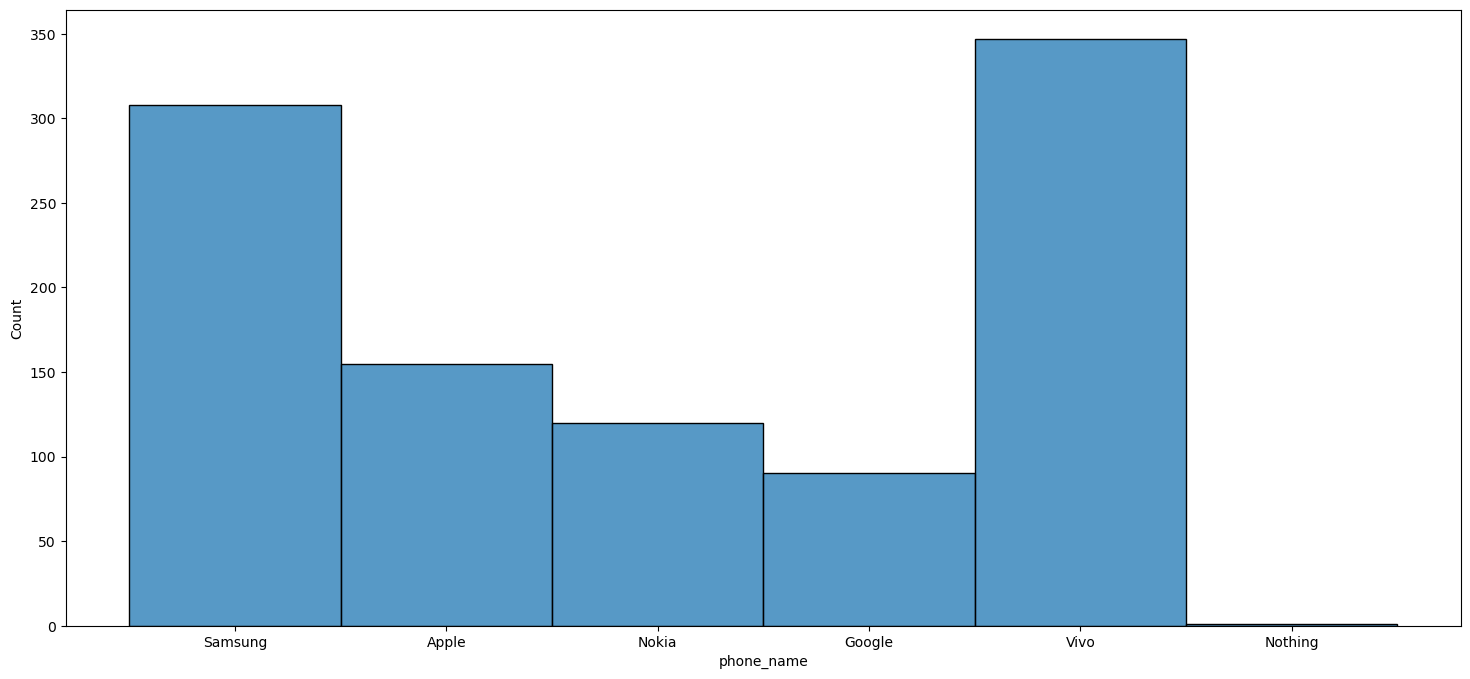

In [75]:
# distribution of data
plt.figure(figsize=(18,8))
sns.histplot(df, x='phone_name',element='bars')
plt.show()

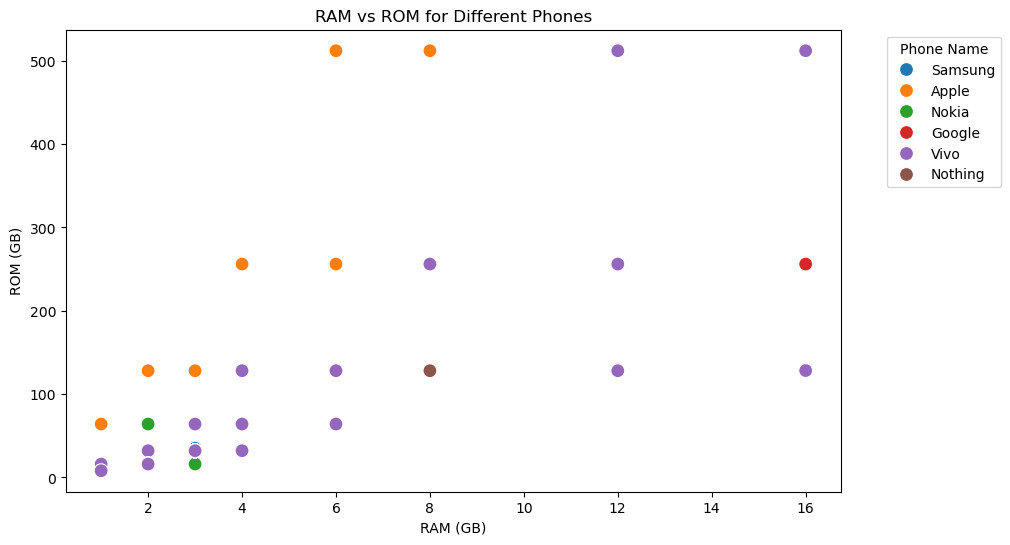

In [77]:
# Scatter plot for RAM vs ROM
plt.figure(figsize=(10, 6))
sns.scatterplot(x= 'ram', y= 'rom', data=df, hue='phone_name', s=100)
plt.title('RAM vs ROM for Different Phones')
plt.xlabel('RAM (GB)')
plt.ylabel('ROM (GB)')
plt.legend(title='Phone Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

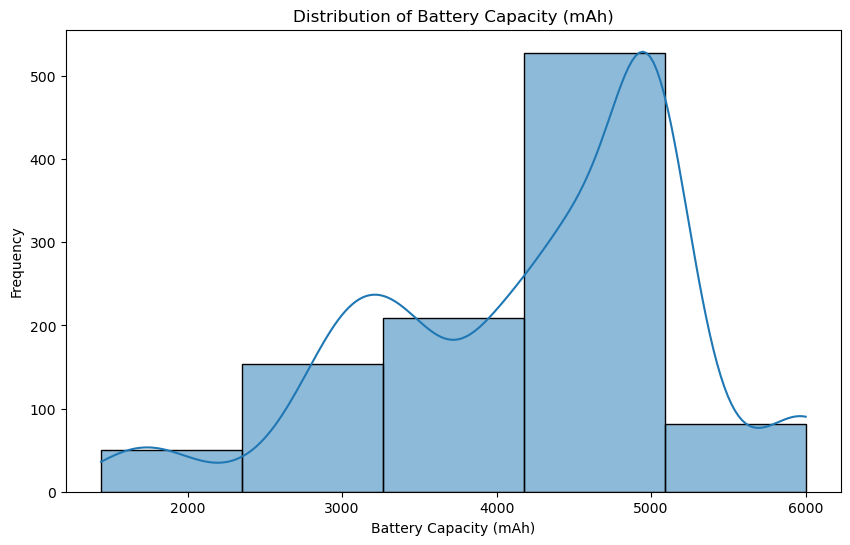

In [79]:
# Histogram for battery capacity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['battery_Mah'], bins=5, kde=True)
plt.title('Distribution of Battery Capacity (mAh)')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Frequency')
plt.show()

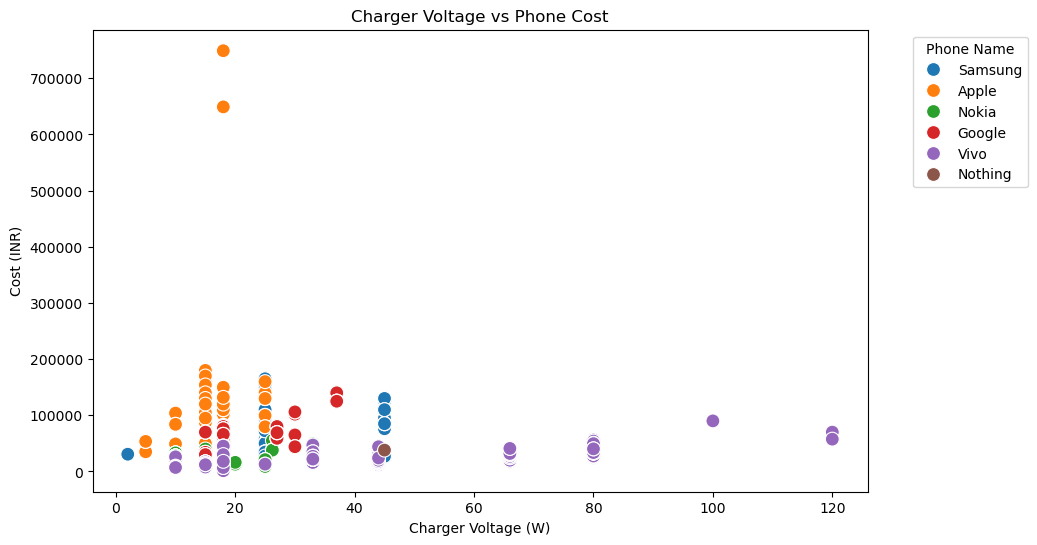

In [81]:
# Scatter plot for charger voltage vs cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='charger_volt', y='cost', data=df, hue='phone_name', s=100)
plt.title('Charger Voltage vs Phone Cost')
plt.xlabel('Charger Voltage (W)')
plt.ylabel('Cost (INR)')
plt.legend(title='Phone Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

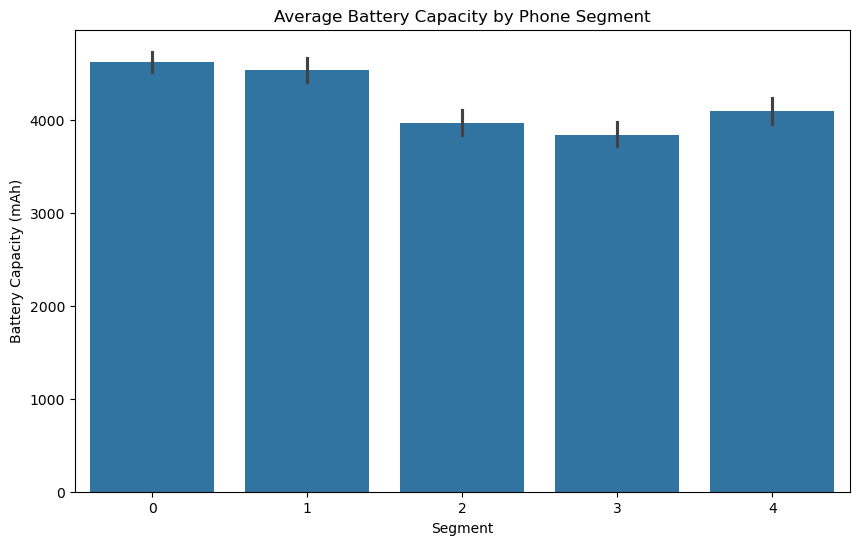

In [87]:
# Bar plot for battery capacity by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='segment', y='battery_Mah', data=df)
plt.title('Average Battery Capacity by Phone Segment')
plt.xlabel('Segment')
plt.ylabel('Battery Capacity (mAh)')
plt.show()

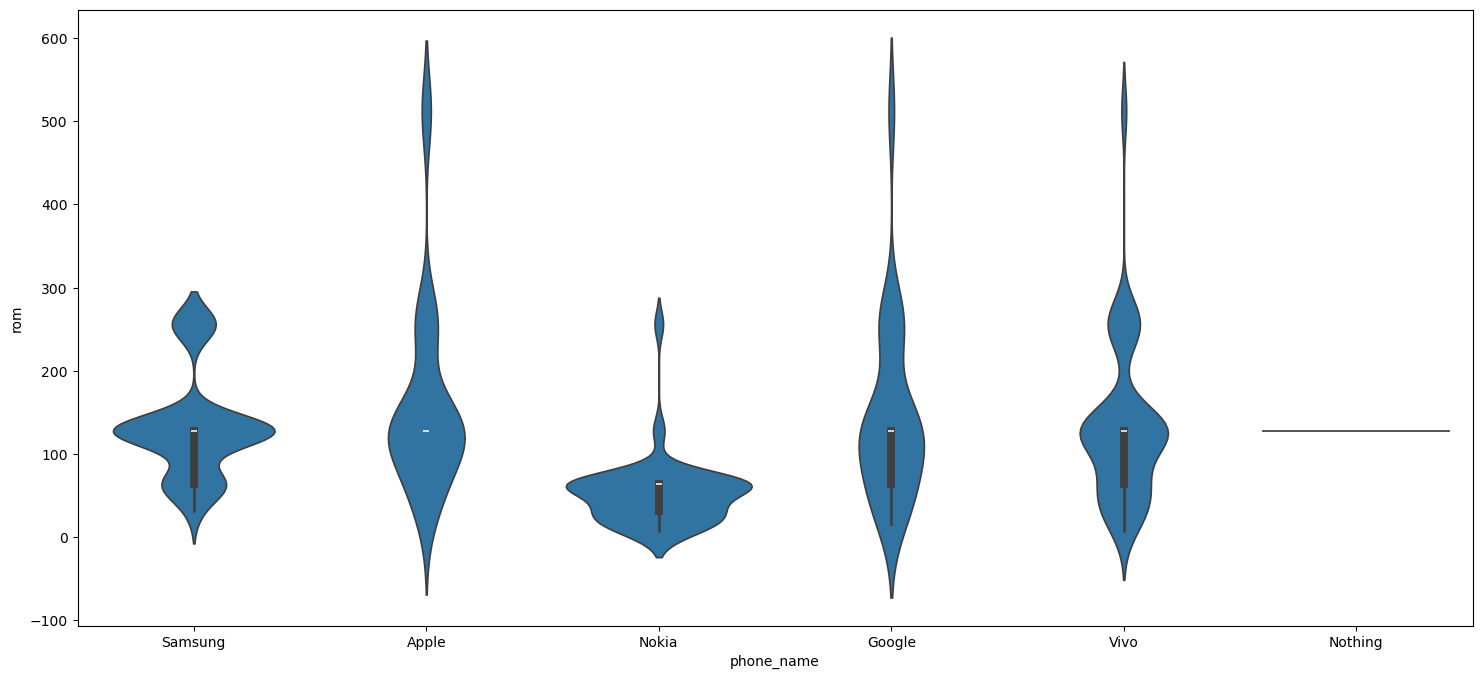

In [93]:
#violin plot for phone name and rom 
plt.figure(figsize=(18,8))
sns.violinplot(df,x='phone_name',y='rom')
plt.show()

<Axes: >

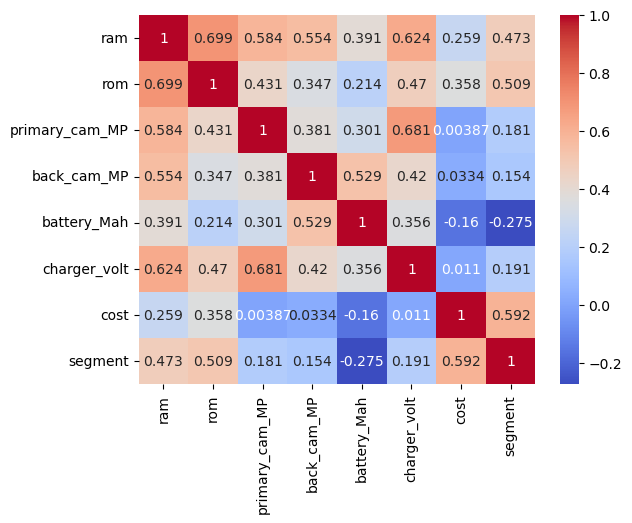

In [97]:
corr = df[['ram', 'rom', 'primary_cam_MP', 'back_cam_MP', 'battery_Mah', 'charger_volt', 'cost', 'segment']].corr()
# heatmap
sns.heatmap(corr, annot=True, fmt='.3g', cmap='coolwarm')